ALPHA BETA PRUNING

In [ ]:
import math

PLAYER = 'X'  # Human
AI = 'O'      # AI
EMPTY = ' '

def create_board():
    return [[EMPTY for _ in range(3)] for _ in range(3)]

def print_board(board):
    for row in board:
        print('|'.join(cell if cell != EMPTY else ' ' for cell in row))
        print('-' * 5)

def check_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or \
           all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or \
       all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_full(board):
    return all(cell != EMPTY for row in board for cell in row)

def evaluate(board):
    if check_winner(board, AI):
        return 1
    elif check_winner(board, PLAYER):
        return -1
    else:
        return 0

def minimax(board, depth, is_maximizing, alpha, beta):
    score = evaluate(board)
    if score != 0 or is_full(board):
        return score

    if is_maximizing:
        best = -math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = AI
                    value = minimax(board, depth + 1, False, alpha, beta)
                    board[i][j] = EMPTY
                    best = max(best, value)
                    alpha = max(alpha, best)
                    if beta <= alpha:
                        break
        return best
    else:
        best = math.inf
        for i in range(3):
            for j in range(3):
                if board[i][j] == EMPTY:
                    board[i][j] = PLAYER
                    value = minimax(board, depth + 1, True, alpha, beta)
                    board[i][j] = EMPTY
                    best = min(best, value)
                    beta = min(beta, best)
                    if beta <= alpha:
                        break
        return best

def find_best_move(board):
    best_val = -math.inf
    best_move = (-1, -1)
    for i in range(3):
        for j in range(3):
            if board[i][j] == EMPTY:
                board[i][j] = AI
                move_val = minimax(board, 0, False, -math.inf, math.inf)
                board[i][j] = EMPTY
                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val
    return best_move

def play_game():
    board = create_board()
    print("Welcome to Tic-Tac-Toe!")
    print("You are 'X'. AI is 'O'.")
    print_board(board)

    while True:
        # Human move
        while True:
            try:
                move = input("Enter your move (row and column: 0 1): ")
                x, y = map(int, move.split())
                if board[x][y] == EMPTY:
                    board[x][y] = PLAYER
                    break
                else:
                    print("Cell already taken. Try again.")
            except (ValueError, IndexError):
                print("Invalid input. Enter row and column as numbers (0-2).")

        print_board(board)

        if check_winner(board, PLAYER):
            print("You win!")
            break
        if is_full(board):
            print("It's a draw!")
            break

        # AI move
        print("AI is thinking...")
        ai_move = find_best_move(board)
        board[ai_move[0]][ai_move[1]] = AI
        print(f"AI moved at {ai_move}")
        print_board(board)

        if check_winner(board, AI):
            print("AI wins!")
            break
        if is_full(board):
            print("It's a draw!")
            break

# Start the game
play_game()


Welcome to Tic-Tac-Toe!
You are 'X'. AI is 'O'.
 | | 
-----
 | | 
-----
 | | 
-----


alpha-beta for tictactoe

In [ ]:
# Alpha-Beta Pruning for Tic-Tac-Toe

def minimax(alpha, beta, depth, maximizing_player, game_state):
    if depth == 0 or game_over(game_state):
        return evaluate(game_state)

    if maximizing_player:
        max_eval = float('-inf')
        for child in generate_children(game_state):
            eval = minimax(alpha, beta, depth - 1, False, child)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break  # Beta cut-off
        return max_eval
    else:
        min_eval = float('inf')
        for child in generate_children(game_state):
            eval = minimax(alpha, beta, depth - 1, True, child)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break  # Alpha cut-off
        return min_eval

# Example simple game state
def evaluate(game_state):
    # A simple evaluation function for Tic-Tac-Toe
    if game_state == "win":
        return 10
    elif game_state == "lose":
        return -10
    else:
        return 0

def game_over(game_state):
    return game_state == "win" or game_state == "lose"  # For simplicity

def generate_children(game_state):
    # Generate child game states from current state (simplified for demonstration)
    children = []
    # Assuming `game_state` is just a string ("win", "lose", or "draw")
    if game_state == "draw":
        children = ["win", "lose"]  # Example of possible next states
    return children

# Example of calling minimax
alpha = float('-inf')
beta = float('inf')
depth = 3  # Search depth
maximizing_player = True  # Maximizing player's turn
game_state = "draw"  # Initial game state

result = minimax(alpha, beta, depth, maximizing_player, game_state)
print("Optimal value:", result)


Optimal value: 10


N-queen

In [ ]:
# N-Queens Problem Solution in Python

def is_safe(board, row, col, n):
    # Check column
    for i in range(row):
        if board[i] == col or board[i] - i == col - row or board[i] + i == col + row:
            return False
    return True

def solve_n_queens(board, row, n):
    if row == n:  # All queens are placed
        return True

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row] = col  # Place queen
            if solve_n_queens(board, row + 1, n):
                return True  # Return true if solution found
            board[row] = -1  # Backtrack if no solution

    return False  # No solution

def print_solution(board, n):
    for i in range(n):
        row = ['Q' if j == board[i] else '.' for j in range(n)]
        print(" ".join(row))
    print("\n")

def n_queens(n):
    board = [-1] * n  # Initialize board with -1 (no queens placed)
    if solve_n_queens(board, 0, n):
        print_solution(board, n)
    else:
        print("No solution exists.")

# Example use:
n = 8  # Size of the board (8x8 for 8-queens)
n_queens(n)


Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .




A*

In [ ]:
import heapq

# Directions for movement in the grid (Up, Down, Left, Right)
DIRECTIONS = [(0, 1), (1, 0), (0, -1), (-1, 0)]

def heuristic(a, b):
    """Manhattan distance heuristic (assuming grid movement is horizontal or vertical)"""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def a_star(grid, start, goal):
    """A* algorithm for pathfinding in a grid"""
    # Priority queue to store nodes to explore (f, g, h, position)
    open_list = []
    heapq.heappush(open_list, (0 + heuristic(start, goal), 0, start))

    # To track the shortest path and the cost
    came_from = {}
    g_score = {start: 0}

    while open_list:
        # Pop the node with the lowest f = g + h
        _, current_g, current = heapq.heappop(open_list)

        # If we've reached the goal, reconstruct the path
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # Return reversed path

        # Explore neighbors
        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])

            # Skip out-of-bound neighbors
            if not (0 <= neighbor[0] < len(grid) and 0 <= neighbor[1] < len(grid[0])):
                continue

            # Skip obstacles (represented by 1 in the grid)
            if grid[neighbor[0]][neighbor[1]] == 1:
                continue

            # Calculate tentative g score for the neighbor
            tentative_g_score = current_g + 1  # Each step has a cost of 1 (can change based on grid)

            # If the neighbor is not in g_score or we found a shorter path
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(open_list, (f_score, tentative_g_score, neighbor))

    # If there is no path to the goal
    return None

# Utility function to print the grid and the path
def print_grid(grid, path=None):
    """Print the grid with the path (if provided)"""
    for i in range(len(grid)):
        row = ""
        for j in range(len(grid[0])):
            if (i, j) == start:
                row += "S "  # Start point
            elif (i, j) == goal:
                row += "G "  # Goal point
            elif path and (i, j) in path:
                row += ". "  # Path
            else:
                row += "# "  # Obstacle
        print(row)

# Example usage
if __name__ == "__main__":
    # Define the grid (0 = free space, 1 = obstacle)
    grid = [
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]
    ]

    # Define start and goal positions
    start = (0, 0)  # Start at top-left corner
    goal = (5, 5)   # Goal at bottom-right corner

    # Find the shortest path
    path = a_star(grid, start, goal)

    # Print the grid and the path
    print("Path found:")
    print(path)
    print("Grid with path:")
    print_grid(grid, path)


Path found:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
Grid with path:
S . . . . . 
# # # # # . 
# # # # # . 
# # # # # . 
# # # # # . 
# # # # # G 


AO*

In [ ]:
import heapq

class Node:
    def __init__(self, name, is_or_node=True):
        self.name = name
        self.is_or_node = is_or_node  # True for OR nodes, False for AND nodes
        self.children = []  # Child nodes (subtasks)
        self.estimated_cost = float('inf')  # Estimated cost to solve this node

    def add_child(self, child_node):
        self.children.append(child_node)

    def set_estimated_cost(self, cost):
        self.estimated_cost = cost

    # Comparison based on the estimated cost for heapq to work
    def __lt__(self, other):
        return self.estimated_cost < other.estimated_cost

    def __repr__(self):
        return f"Node({self.name}, cost={self.estimated_cost})"

class AOStar:
    def __init__(self, root_node):
        self.root_node = root_node  # The starting node (problem to solve)

    def search(self):
        open_list = []
        closed_list = set()

        # Initialize the root node with an estimated cost of 0
        self.root_node.set_estimated_cost(0)

        # Add the root node to the open list with the initial cost
        heapq.heappush(open_list, self.root_node)

        while open_list:
            current_node = heapq.heappop(open_list)

            if current_node in closed_list:
                continue

            closed_list.add(current_node)

            # Evaluate the current node based on whether it's an AND or OR node
            if current_node.is_or_node:
                # OR node: Take the least costly child node to expand
                if current_node.children:
                    # Ensure the children have valid costs before selecting
                    valid_children = [child for child in current_node.children if child.estimated_cost < float('inf')]
                    if valid_children:
                        best_child = min(valid_children, key=lambda child: child.estimated_cost)
                        current_node.set_estimated_cost(best_child.estimated_cost)
                        print(f"Evaluating OR node {current_node.name}: Best child cost = {best_child.estimated_cost}")
                    else:
                        print(f"Evaluating OR node {current_node.name}: No valid children to evaluate.")
                else:
                    print(f"Evaluating OR node {current_node.name}: No children to evaluate.")
            else:
                # AND node: All child nodes need to be solved
                if current_node.children:
                    # Ensure all children have valid costs before summing
                    valid_children = [child for child in current_node.children if child.estimated_cost < float('inf')]
                    if valid_children:
                        total_cost = sum(child.estimated_cost for child in valid_children)
                        current_node.set_estimated_cost(total_cost)
                        print(f"Evaluating AND node {current_node.name}: Total cost = {total_cost}")
                    else:
                        print(f"Evaluating AND node {current_node.name}: No valid children to evaluate.")
                else:
                    print(f"Evaluating AND node {current_node.name}: No children to evaluate.")

            # Add all the children of the current node to the open list for further evaluation
            for child in current_node.children:
                if child not in closed_list:
                    heapq.heappush(open_list, child)

        # Return the total estimated cost to solve the root node
        return self.root_node.estimated_cost


# Example problem: Robot navigation with AND/OR graph
if __name__ == "__main__":
    # Create nodes for the problem (AND and OR nodes)
    start = Node("Start", is_or_node=True)  # Root is an OR node

    # Create OR children (choices: A or B)
    a = Node("A", is_or_node=False)  # AND node for path A
    b = Node("B", is_or_node=False)  # AND node for path B

    start.add_child(a)
    start.add_child(b)

    # Create AND children for path A
    a_to_c = Node("A → C", is_or_node=True)  # OR node for path A → C
    a_to_d = Node("A → D", is_or_node=True)  # OR node for path A → D

    a.add_child(a_to_c)
    a.add_child(a_to_d)

    # Create AND children for A → C
    c_to_goal = Node("C → Goal", is_or_node=False)  # AND node for A → C → Goal
    a_to_c.add_child(c_to_goal)

    # Create AND children for A → D
    d_to_goal = Node("D → Goal", is_or_node=False)  # AND node for A → D → Goal
    a_to_d.add_child(d_to_goal)

    # Set costs for leaf nodes (goal states)
    start.set_estimated_cost(0)  # Starting point
    a.set_estimated_cost(3)  # Cost to reach A from Start
    b.set_estimated_cost(5)  # Cost to reach B from Start
    a_to_c.set_estimated_cost(4)  # Cost to go from A to C
    a_to_d.set_estimated_cost(2)  # Cost to go from A to D
    c_to_goal.set_estimated_cost(6)  # Cost to go from C to Goal
    d_to_goal.set_estimated_cost(7)  # Cost to go from D to Goal

    # Start AO* search
    ao_star = AOStar(start)
    total_cost = ao_star.search()
    print(f"Total estimated cost to solve the problem: {total_cost}")


Evaluating OR node Start: Best child cost = 3
Evaluating AND node A: Total cost = 6
Evaluating OR node A → D: Best child cost = 7
Evaluating OR node A → C: Best child cost = 6
Evaluating AND node B: No children to evaluate.
Evaluating AND node C → Goal: No children to evaluate.
Evaluating AND node D → Goal: No children to evaluate.
Total estimated cost to solve the problem: 3


minimax

In [ ]:
import math

# Constants for players
X_PLAYER = 'X'
O_PLAYER = 'O'
EMPTY = ' '

# Define the board
def print_board(board):
    for row in range(3):
        print(" | ".join(board[row]))
        if row < 2:
            print("--------")

# Check if a player has won
def check_winner(board, player):
    # Check rows, columns, and diagonals
    for row in range(3):
        if all([cell == player for cell in board[row]]):
            return True
    for col in range(3):
        if all([board[row][col] == player for row in range(3)]):
            return True
    if all([board[i][i] == player for i in range(3)]) or all([board[i][2 - i] == player for i in range(3)]):
        return True
    return False

# Evaluate the current board's state
def evaluate(board):
    if check_winner(board, X_PLAYER):
        return 1
    elif check_winner(board, O_PLAYER):
        return -1
    return 0

# Check if the game is over (either win or draw)
def is_game_over(board):
    return check_winner(board, X_PLAYER) or check_winner(board, O_PLAYER) or all([cell != EMPTY for row in board for cell in row])

# Get available moves
def get_available_moves(board):
    return [(row, col) for row in range(3) for col in range(3) if board[row][col] == EMPTY]

# Minimax algorithm with alpha-beta pruning
def minimax(board, depth, is_maximizing):
    if is_game_over(board) or depth == 0:
        return evaluate(board)

    if is_maximizing:
        best = -math.inf
        for move in get_available_moves(board):
            row, col = move
            board[row][col] = X_PLAYER  # Try move for maximizing player (X)
            best = max(best, minimax(board, depth - 1, False))
            board[row][col] = EMPTY  # Undo move
        return best
    else:
        best = math.inf
        for move in get_available_moves(board):
            row, col = move
            board[row][col] = O_PLAYER  # Try move for minimizing player (O)
            best = min(best, minimax(board, depth - 1, True))
            board[row][col] = EMPTY  # Undo move
        return best

# Find the best move for the current player (X)
def find_best_move(board):
    best_val = -math.inf
    best_move = None
    for move in get_available_moves(board):
        row, col = move
        board[row][col] = X_PLAYER  # Try move for maximizing player (X)
        move_val = minimax(board, 9, False)  # depth is arbitrary (9 for max depth)
        board[row][col] = EMPTY  # Undo move

        if move_val > best_val:
            best_val = move_val
            best_move = move
    return best_move

# Main function to play the game
def play_game():
    board = [[EMPTY] * 3 for _ in range(3)]
    print("Tic-Tac-Toe: X is the AI, O is the opponent.")
    print_board(board)

    while not is_game_over(board):
        # AI's move (Maximizing player)
        row, col = find_best_move(board)
        board[row][col] = X_PLAYER
        print(f"AI (X) chooses: ({row+1}, {col+1})")
        print_board(board)

        if is_game_over(board):
            break

        # Player's move (Minimizing player)
        row, col = map(int, input("Your move (row col): ").split())
        row, col = row - 1, col - 1  # Convert to 0-indexed
        if board[row][col] == EMPTY:
            board[row][col] = O_PLAYER
        else:
            print("Invalid move, try again.")
            continue
        print_board(board)

    if check_winner(board, X_PLAYER):
        print("AI wins!")
    elif check_winner(board, O_PLAYER):
        print("Player wins!")
    else:
        print("It's a draw!")

# Start the game
if __name__ == "__main__":
    play_game()


Tic-Tac-Toe: X is the AI, O is the opponent.
  |   |  
--------
  |   |  
--------
  |   |  
AI (X) chooses: (1, 1)
X |   |  
--------
  |   |  
--------
  |   |  
Your move (row col): 2 2
X |   |  
--------
  | O |  
--------
  |   |  
AI (X) chooses: (1, 2)
X | X |  
--------
  | O |  
--------
  |   |  
Your move (row col): 1 3
X | X | O
--------
  | O |  
--------
  |   |  
AI (X) chooses: (3, 1)
X | X | O
--------
  | O |  
--------
X |   |  
Your move (row col): 2 1
X | X | O
--------
O | O |  
--------
X |   |  
AI (X) chooses: (2, 3)
X | X | O
--------
O | O | X
--------
X |   |  
Your move (row col): 3 2
X | X | O
--------
O | O | X
--------
X | O |  
AI (X) chooses: (3, 3)
X | X | O
--------
O | O | X
--------
X | O | X
It's a draw!


decision theory

In [ ]:
# Define the Payoff Matrix
payoff_matrix = {
    'Invest': {'Market Up': 100, 'Market Down': -50},
    'Do Not Invest': {'Market Up': 0, 'Market Down': 0}
}

# Define the probabilities for each state of nature
probabilities = {'Market Up': 0.6, 'Market Down': 0.4}

# Function to calculate the expected utility of a decision
def expected_utility(decision, payoff_matrix, probabilities):
    expected_value = 0
    for state, probability in probabilities.items():
        expected_value += payoff_matrix[decision][state] * probability
    return expected_value

# Function to calculate and choose the best decision
def choose_best_decision(payoff_matrix, probabilities):
    best_decision = None
    best_utility = -float('inf')  # Start with a very small number

    # Calculate expected utility for each decision
    for decision in payoff_matrix:
        utility = expected_utility(decision, payoff_matrix, probabilities)
        print(f"Expected Utility of '{decision}': {utility}")

        # Track the best decision
        if utility > best_utility:
            best_utility = utility
            best_decision = decision

    return best_decision, best_utility

# Main function
if __name__ == "__main__":
    best_decision, best_utility = choose_best_decision(payoff_matrix, probabilities)
    print(f"The best decision is '{best_decision}' with an expected utility of {best_utility}")


Expected Utility of 'Invest': 40.0
Expected Utility of 'Do Not Invest': 0.0
The best decision is 'Invest' with an expected utility of 40.0


iterative deepening

In [ ]:
# Define the Tree Node structure
class Node:
    def __init__(self, state, parent=None):
        self.state = state  # The state or value of the node
        self.parent = parent  # The parent node
        self.children = []  # List of children nodes

    def add_child(self, child_node):
        self.children.append(child_node)

    def __str__(self):
        return f"Node({self.state})"

# Depth-limited search (DFS with a maximum depth limit)
def depth_limited_search(node, goal_state, depth_limit):
    # If we have reached the goal node
    if node.state == goal_state:
        return node
    elif depth_limit == 0:
        return None  # Limit reached without finding the goal
    else:
        # Explore the children
        for child in node.children:
            result = depth_limited_search(child, goal_state, depth_limit - 1)
            if result is not None:
                return result
        return None

# Iterative Deepening Search
def iterative_deepening_search(root, goal_state):
    depth_limit = 0
    while True:
        print(f"Depth Limit: {depth_limit}")
        result = depth_limited_search(root, goal_state, depth_limit)
        if result is not None:
            # Reconstruct the path from the goal to the root
            path = []
            while result is not None:
                path.append(result.state)
                result = result.parent
            return path[::-1]  # Reverse the path to get it from root to goal
        depth_limit += 1  # Increase the depth limit

# Example Tree
root = Node(1)
node2 = Node(2, root)
node3 = Node(3, root)
root.add_child(node2)
root.add_child(node3)

node4 = Node(4, node2)
node5 = Node(5, node2)
node2.add_child(node4)
node2.add_child(node5)

node6 = Node(6, node3)
node7 = Node(7, node3)
node3.add_child(node6)
node3.add_child(node7)

# Goal state to find
goal_state = 5

# Start Iterative Deepening Search
path = iterative_deepening_search(root, goal_state)
print(f"Path to goal {goal_state}: {path}")


Depth Limit: 0
Depth Limit: 1
Depth Limit: 2
Path to goal 5: [1, 2, 5]


genetic algorithm

In [ ]:
import random

# Define the fitness function (objective function)
def fitness(x):
    return x ** 2  # Maximizing x^2

# Convert a binary string to an integer
def binary_to_decimal(binary_str):
    return int(binary_str, 2)

# Create an initial population of random binary strings
def create_population(population_size, gene_length):
    population = []
    for _ in range(population_size):
        individual = ''.join(random.choice('01') for _ in range(gene_length))
        population.append(individual)
    return population

# Perform selection based on fitness (roulette wheel selection)
def selection(population, fitness_func):
    fitness_values = [fitness_func(binary_to_decimal(ind)) for ind in population]
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    selected_index = random.choices(range(len(population)), probabilities, k=2)
    return population[selected_index[0]], population[selected_index[1]]

# Perform crossover (single-point crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Perform mutation (flip a random bit)
def mutate(individual, mutation_rate):
    individual = list(individual)  # Convert to list to mutate
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(individual)

# Main function for genetic algorithm
def genetic_algorithm(population_size, gene_length, generations, mutation_rate):
    population = create_population(population_size, gene_length)
    best_solution = None
    best_fitness = -float('inf')

    for generation in range(generations):
        new_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = selection(population, fitness)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])

        population = new_population

        # Track the best solution found so far
        for individual in population:
            individual_value = binary_to_decimal(individual)
            individual_fitness = fitness(individual_value)
            if individual_fitness > best_fitness:
                best_fitness = individual_fitness
                best_solution = individual_value

        print(f"Generation {generation + 1}: Best Solution = {best_solution}, Fitness = {best_fitness}")

    return best_solution, best_fitness

# Parameters for the Genetic Algorithm
population_size = 10
gene_length = 10  # Length of binary string
generations = 20
mutation_rate = 0.01  # Probability of mutation

# Run the genetic algorithm
best_solution, best_fitness = genetic_algorithm(population_size, gene_length, generations, mutation_rate)
print(f"\nBest solution found: {best_solution}, Fitness: {best_fitness}")



Generation 1: Best Solution = 1002, Fitness = 1004004
Generation 2: Best Solution = 1002, Fitness = 1004004
Generation 3: Best Solution = 1002, Fitness = 1004004
Generation 4: Best Solution = 1006, Fitness = 1012036
Generation 5: Best Solution = 1006, Fitness = 1012036
Generation 6: Best Solution = 1006, Fitness = 1012036
Generation 7: Best Solution = 1006, Fitness = 1012036
Generation 8: Best Solution = 1006, Fitness = 1012036
Generation 9: Best Solution = 1006, Fitness = 1012036
Generation 10: Best Solution = 1006, Fitness = 1012036
Generation 11: Best Solution = 1006, Fitness = 1012036
Generation 12: Best Solution = 1006, Fitness = 1012036
Generation 13: Best Solution = 1006, Fitness = 1012036
Generation 14: Best Solution = 1006, Fitness = 1012036
Generation 15: Best Solution = 1006, Fitness = 1012036
Generation 16: Best Solution = 1014, Fitness = 1028196
Generation 17: Best Solution = 1014, Fitness = 1028196
Generation 18: Best Solution = 1014, Fitness = 1028196
Generation 19: Best

Wumpus world

In [ ]:
import random

# Directions the agent can move
DIRECTIONS = ['UP', 'DOWN', 'LEFT', 'RIGHT']

# Define the Wumpus World as a 4x4 grid
GRID_SIZE = 4

# Initialize the world state
class WumpusWorld:
    def __init__(self):
        # Create a 4x4 grid with empty values
        self.grid = [['' for _ in range(GRID_SIZE)] for _ in range(GRID_SIZE)]

        # Randomly place the Wumpus, pits, and gold
        self.wumpus_pos = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        self.gold_pos = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        self.agent_pos = (0, 0)  # Agent starts at the top-left corner

        # Avoid placing Wumpus and gold at the same position
        while self.wumpus_pos == self.gold_pos:
            self.gold_pos = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

        # Randomly place pits (avoid placing pits where agent, Wumpus, or gold are)
        self.pits = set()
        while len(self.pits) < 3:
            pit = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
            if pit not in [self.agent_pos, self.wumpus_pos, self.gold_pos]:
                self.pits.add(pit)

        # Set the grid's breeze and stench information based on pits and Wumpus
        self.breeze = self.create_breeze()
        self.stench = self.create_stench()

    def create_breeze(self):
        breeze = {}
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) in self.pits:
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        nx, ny = i + dx, j + dy
                        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
                            breeze[(nx, ny)] = True
        return breeze

    def create_stench(self):
        stench = {}
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == self.wumpus_pos:
                    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        nx, ny = i + dx, j + dy
                        if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE:
                            stench[(nx, ny)] = True
        return stench

    def print_world(self):
        print("Wumpus World:")
        for i in range(GRID_SIZE):
            for j in range(GRID_SIZE):
                if (i, j) == self.agent_pos:
                    print("A", end=" ")
                elif (i, j) == self.wumpus_pos:
                    print("W", end=" ")
                elif (i, j) == self.gold_pos:
                    print("G", end=" ")
                elif (i, j) in self.pits:
                    print("P", end=" ")
                else:
                    print(".", end=" ")
            print()

    def is_safe(self, position):
        return position not in self.pits and position != self.wumpus_pos

    def sense_breeze(self):
        return self.breeze.get(self.agent_pos, False)

    def sense_stench(self):
        return self.stench.get(self.agent_pos, False)

    def move_agent(self, direction):
        x, y = self.agent_pos
        if direction == 'UP' and x > 0:
            self.agent_pos = (x-1, y)
        elif direction == 'DOWN' and x < GRID_SIZE-1:
            self.agent_pos = (x+1, y)
        elif direction == 'LEFT' and y > 0:
            self.agent_pos = (x, y-1)
        elif direction == 'RIGHT' and y < GRID_SIZE-1:
            self.agent_pos = (x, y+1)

    def agent_action(self):
        print(f"\nAgent is at position {self.agent_pos}")
        if self.agent_pos == self.gold_pos:
            print("Agent found the gold!")
            return True
        if self.agent_pos == self.wumpus_pos:
            print("Agent was eaten by the Wumpus!")
            return True
        if self.sense_breeze():
            print("Breeze detected! There's a pit nearby.")
        if self.sense_stench():
            print("Stench detected! The Wumpus is nearby.")

        # Simulate a random movement decision (for now)
        safe_moves = [d for d in DIRECTIONS if self.is_safe(self.get_next_position(d))]
        if not safe_moves:
            print("No safe moves available!")
            return True

        move = random.choice(safe_moves)
        print(f"Agent moves {move}.")
        self.move_agent(move)
        return False

    def get_next_position(self, direction):
        x, y = self.agent_pos
        if direction == 'UP':
            return (x-1, y)
        elif direction == 'DOWN':
            return (x+1, y)
        elif direction == 'LEFT':
            return (x, y-1)
        elif direction == 'RIGHT':
            return (x, y+1)

# Main loop for running the game
def play_wumpus_world():
    wumpus_world = WumpusWorld()
    game_over = False

    while not game_over:
        wumpus_world.print_world()
        game_over = wumpus_world.agent_action()

play_wumpus_world()


Wumpus World:
A . . . 
. P . . 
P . . G 
. P W . 

Agent is at position (0, 0)
Agent moves DOWN.
Wumpus World:
. . . . 
A P . . 
P . . G 
. P W . 

Agent is at position (1, 0)
Breeze detected! There's a pit nearby.
Agent moves LEFT.
Wumpus World:
. . . . 
A P . . 
P . . G 
. P W . 

Agent is at position (1, 0)
Breeze detected! There's a pit nearby.
Agent moves UP.
Wumpus World:
A . . . 
. P . . 
P . . G 
. P W . 

Agent is at position (0, 0)
Agent moves DOWN.
Wumpus World:
. . . . 
A P . . 
P . . G 
. P W . 

Agent is at position (1, 0)
Breeze detected! There's a pit nearby.
Agent moves UP.
Wumpus World:
A . . . 
. P . . 
P . . G 
. P W . 

Agent is at position (0, 0)
Agent moves DOWN.
Wumpus World:
. . . . 
A P . . 
P . . G 
. P W . 

Agent is at position (1, 0)
Breeze detected! There's a pit nearby.
Agent moves LEFT.
Wumpus World:
. . . . 
A P . . 
P . . G 
. P W . 

Agent is at position (1, 0)
Breeze detected! There's a pit nearby.
Agent moves LEFT.
Wumpus World:
. . . . 
A P . . 
P

dijkstra

In [ ]:
import heapq

DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def dijkstra(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    distances = { (x, y): float('inf') for x in range(rows) for y in range(cols)}
    distances[start] = 0

    prev_nodes = { (x, y): None for x in range(rows) for y in range(cols)}

    priority_queue = [(0, start)]  # (distance, position)

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_node == goal:
            # Reconstruct path
            path = []
            while current_node:
                path.append(current_node)
                current_node = prev_nodes[current_node]
            return path[::-1]  # Return reversed path

        for direction in DIRECTIONS:
            neighbor = (current_node[0] + direction[0], current_node[1] + direction[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0:
                distance = current_distance + 1
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    prev_nodes[neighbor] = current_node
                    heapq.heappush(priority_queue, (distance, neighbor))

    return None  # No path found

# Example grid (0 = free space, 1 = obstacle)
grid = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)

path = dijkstra(start, goal, grid)
print("Dijkstra Path:", path)


Dijkstra Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


bfs and dfs

In [ ]:
from collections import deque

DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def bfs(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    queue = deque([start])
    prev_nodes = { start: None }

    while queue:
        current_node = queue.popleft()

        if current_node == goal:
            # Reconstruct path
            path = []
            while current_node:
                path.append(current_node)
                current_node = prev_nodes[current_node]
            return path[::-1]  # Return reversed path

        for direction in DIRECTIONS:
            neighbor = (current_node[0] + direction[0], current_node[1] + direction[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in prev_nodes:
                queue.append(neighbor)
                prev_nodes[neighbor] = current_node

    return None  # No path found

# Example grid (0 = free space, 1 = obstacle)
grid = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)

path = bfs(start, goal, grid)
print("BFS Path:", path)


BFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


In [ ]:
# Directions: up, down, left, right
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def dfs(start, goal, grid):
    rows, cols = len(grid), len(grid[0])
    stack = [start]  # stack for DFS (last-in, first-out)
    prev_nodes = { start: None }  # To reconstruct the path

    while stack:
        current_node = stack.pop()  # Pop the last node from the stack

        if current_node == goal:
            # Reconstruct path
            path = []
            while current_node:
                path.append(current_node)
                current_node = prev_nodes[current_node]
            return path[::-1]  # Return reversed path

        # Explore neighbors
        for direction in DIRECTIONS:
            neighbor = (current_node[0] + direction[0], current_node[1] + direction[1])

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor[0]][neighbor[1]] == 0 and neighbor not in prev_nodes:
                stack.append(neighbor)
                prev_nodes[neighbor] = current_node

    return None  # No path found

# Example grid (0 = free space, 1 = obstacle)
grid = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)

path = dfs(start, goal, grid)
print("DFS Path:", path)


DFS Path: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


voronoi diagram

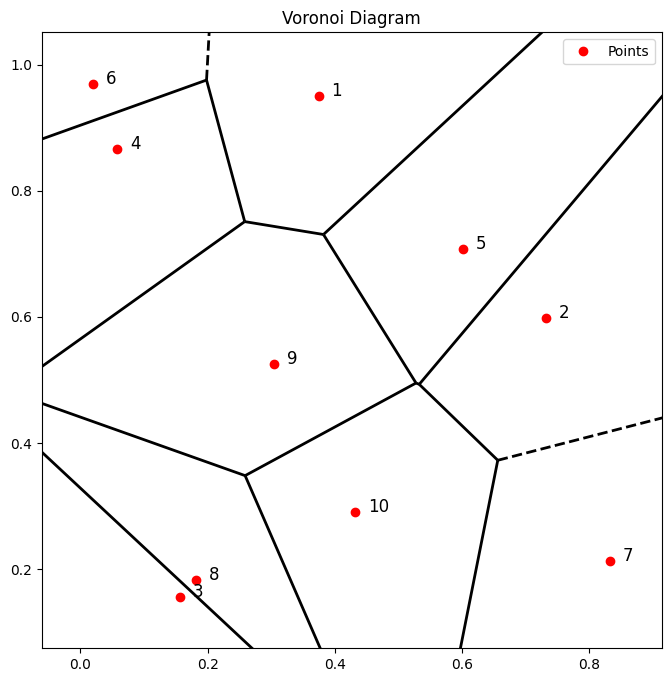

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Step 1: Generate random points (seeds for the Voronoi diagram)
np.random.seed(42)  # For reproducibility
num_points = 10
points = np.random.rand(num_points, 2)  # Random points in the unit square (0,1) x (0,1)

# Step 2: Compute the Voronoi diagram
vor = Voronoi(points)

# Step 3: Visualize the Voronoi diagram
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_width=2, line_color='blue')

# Plot the original points
ax.plot(points[:, 0], points[:, 1], 'ro', label='Points')

# Add labels for each point
for i, point in enumerate(points):
    ax.text(point[0] + 0.02, point[1], f'{i+1}', fontsize=12)

# Add a title
ax.set_title('Voronoi Diagram')

# Show the plot
plt.legend()
plt.show()


grassfire algo

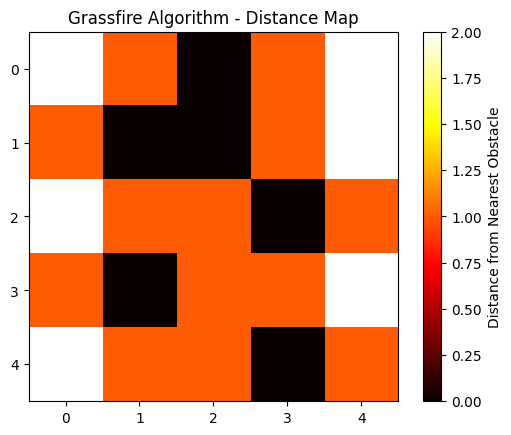

Distance Map:
[[2 1 0 1 2]
 [1 0 0 1 2]
 [2 1 1 0 1]
 [1 0 1 1 2]
 [2 1 1 0 1]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Directions: up, down, left, right
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def grassfire(grid, start_positions):
    """
    Implements the Grassfire algorithm to generate a distance map.

    :param grid: 2D grid (numpy array) representing the environment (1 for obstacles, 0 for free spaces)
    :param start_positions: List of starting positions (obstacle positions) where distance = 0
    :return: Distance map as a 2D grid with distances from the nearest obstacle
    """
    rows, cols = grid.shape
    distance_map = np.full_like(grid, -1)  # Initialize distance map with -1 (unvisited)

    # Queue for BFS (stores positions to be processed)
    queue = deque()

    # Set distances of obstacles to 0 and add to the queue
    for (r, c) in start_positions:
        distance_map[r, c] = 0
        queue.append((r, c))

    while queue:
        current_row, current_col = queue.popleft()

        # Check all 4 neighbors (up, down, left, right)
        for direction in DIRECTIONS:
            neighbor_row, neighbor_col = current_row + direction[0], current_col + direction[1]

            if 0 <= neighbor_row < rows and 0 <= neighbor_col < cols and distance_map[neighbor_row, neighbor_col] == -1:
                distance_map[neighbor_row, neighbor_col] = distance_map[current_row, current_col] + 1
                queue.append((neighbor_row, neighbor_col))

    return distance_map

# Example Grid: 0 = free space, 1 = obstacle
grid = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

# Obstacles are at positions where grid value is 1
obstacles = [(0, 2), (1, 1), (1, 2), (2, 3), (3, 1), (4, 3)]

# Run the Grassfire algorithm to compute the distance map
distance_map = grassfire(grid, obstacles)

# Visualize the distance map
plt.imshow(distance_map, cmap='hot', interpolation='nearest')
plt.colorbar(label="Distance from Nearest Obstacle")
plt.title("Grassfire Algorithm - Distance Map")
plt.show()

# Print the distance map for debugging
print("Distance Map:")
print(distance_map)


strips

In [ ]:
class BlockWorldPlanner:
    def __init__(self, blocks, goal_state):
        # Initialize with blocks and the goal state
        self.blocks = blocks  # List of blocks (e.g., ['A', 'B', 'C'])
        self.goal_state = goal_state  # Goal state (e.g., [('A', 'B'), ('B', 'C')])
        self.initial_state = {block: 'table' for block in blocks}  # All blocks are on the table initially
        self.actions = []  # List to hold the sequence of actions

    def is_goal_state(self, state):
        """Check if the current state is the goal state."""
        for block, stack in self.goal_state:
            if state.get(block) != stack:
                return False
        return True

    def apply_action(self, action, state):
        """Apply an action to a state and return the new state."""
        new_state = state.copy()
        action_type, params = action
        if action_type == "pick_up":
            block = params[0]
            new_state[block] = 'hand'
        elif action_type == "stack":
            block, stack_on = params
            new_state[block] = stack_on
        return new_state

    def plan(self):
        """Generate a plan to reach the goal state from the initial state."""
        current_state = self.initial_state
        self.actions = []  # Clear any previous actions

        # Simple strategy: Try to match each goal state one-by-one
        for goal_block, goal_stack in self.goal_state:
            # If block is not on the right stack, pick it up and stack it correctly
            if current_state[goal_block] != goal_stack:
                # If the block is on the table, pick it up
                if current_state[goal_block] == 'table':
                    self.actions.append(("pick_up", (goal_block,)))
                    current_state = self.apply_action(self.actions[-1], current_state)

                # Stack the block on top of the target block (or 'table')
                self.actions.append(("stack", (goal_block, goal_stack)))
                current_state = self.apply_action(self.actions[-1], current_state)

            if self.is_goal_state(current_state):
                break

        return self.actions

# Initialize the Block World with blocks A, B, C and the goal configuration
blocks = ['A', 'B', 'C']
goal_state = [('A', 'B'), ('B', 'C')]

planner = BlockWorldPlanner(blocks, goal_state)
plan = planner.plan()

# Print out the actions in the plan
print("Generated Plan:")
for action in plan:
    print(action)



Generated Plan:
('pick_up', ('A',))
('stack', ('A', 'B'))
('pick_up', ('B',))
('stack', ('B', 'C'))


c space

In [ ]:
import numpy as np

# Define a 2D transformation matrix for translation and rotation
def transformation_matrix(x_translation, y_translation, angle_rotation):
    """Create a 2D transformation matrix for translation and rotation."""
    rotation_matrix = np.array([
        [np.cos(angle_rotation), -np.sin(angle_rotation)],
        [np.sin(angle_rotation), np.cos(angle_rotation)]
    ])
    translation_vector = np.array([x_translation, y_translation])

    # Homogeneous transformation matrix
    transformation_matrix = np.eye(3)  # 3x3 Identity matrix
    transformation_matrix[:2, :2] = rotation_matrix
    transformation_matrix[:2, 2] = translation_vector

    return transformation_matrix

# Example: Moving the robot (translate by 2 units in x, 3 units in y, and rotate by 45 degrees)
x_translation = 2
y_translation = 3
angle_rotation = np.pi / 4  # 45 degrees in radians

transform = transformation_matrix(x_translation, y_translation, angle_rotation)

print("Transformation Matrix:")
print(transform)


Transformation Matrix:
[[ 0.70710678 -0.70710678  2.        ]
 [ 0.70710678  0.70710678  3.        ]
 [ 0.          0.          1.        ]]


In [ ]:
# Example: A robot at initial position (1, 1)
initial_position = np.array([1, 1, 1])  # Homogeneous coordinates (x, y, 1)

# Apply the transformation
new_position = np.dot(transform, initial_position)

print("New Position after Transformation:")
print(new_position)


New Position after Transformation:
[2.         4.41421356 1.        ]


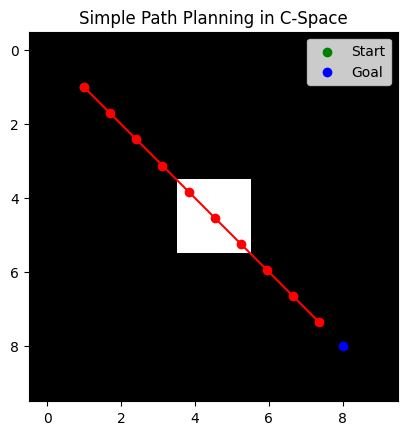

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple 2D grid as the C-space (0: free, 1: obstacle)
grid = np.zeros((10, 10))
grid[4:6, 4:6] = 1  # Place an obstacle in the middle

# Initial and goal positions (robot starts at (1, 1) and goal is at (8, 8))
start_position = np.array([1, 1])
goal_position = np.array([8, 8])

# Pathfinding using simple transformations (e.g., direct movement)
def simple_path_planning(start, goal, grid):
    current_position = start
    path = [current_position]

    # Simulate movement towards the goal (ignore obstacles for simplicity)
    while np.linalg.norm(current_position - goal) > 1:
        direction = goal - current_position
        direction = direction / np.linalg.norm(direction)  # Normalize direction
        current_position = current_position + direction  # Move in the direction of the goal
        path.append(current_position)

    return np.array(path)

# Plan the path
path = simple_path_planning(start_position, goal_position, grid)

# Plot the grid and path
plt.imshow(grid, cmap='gray')
plt.plot(path[:, 0], path[:, 1], 'r-', marker='o')
plt.scatter(start_position[0], start_position[1], color='green', label='Start')
plt.scatter(goal_position[0], goal_position[1], color='blue', label='Goal')
plt.legend()
plt.title("Simple Path Planning in C-Space")
plt.show()


lattice graphs

In [ ]:
import heapq

class LatticeGraph:
    def __init__(self, grid):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])

    def get_neighbors(self, node):
        """Get the valid neighboring nodes for the current node."""
        x, y = node
        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Left, Right, Up, Down

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < self.rows and 0 <= ny < self.cols and self.grid[nx][ny] == 0:  # 0 means free space
                neighbors.append((nx, ny))
        return neighbors

def a_star(lattice_graph, start, goal):
    """A* algorithm for pathfinding."""
    open_list = []
    closed_list = set()

    # Heuristic: Manhattan distance
    def heuristic(node):
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

    heapq.heappush(open_list, (0 + heuristic(start), 0, start, []))  # (f, g, node, path)

    while open_list:
        _, g, current, path = heapq.heappop(open_list)

        if current == goal:
            return path + [current]

        closed_list.add(current)

        for neighbor in lattice_graph.get_neighbors(current):
            if neighbor not in closed_list:
                new_path = path + [current]
                heapq.heappush(open_list, (g + 1 + heuristic(neighbor), g + 1, neighbor, new_path))

    return None  # If no path is found

# Example grid: 0 is free space, 1 is an obstacle
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

# Create lattice graph
lattice_graph = LatticeGraph(grid)

# Define start and goal positions
start = (0, 0)  # Start at the top-left corner
goal = (4, 4)   # Goal at the bottom-right corner

# Find the path using A*
path = a_star(lattice_graph, start, goal)

# Display the result
print("Path from start to goal:", path)



Path from start to goal: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4)]


rapidly exploring random tree(RRT ALgo)

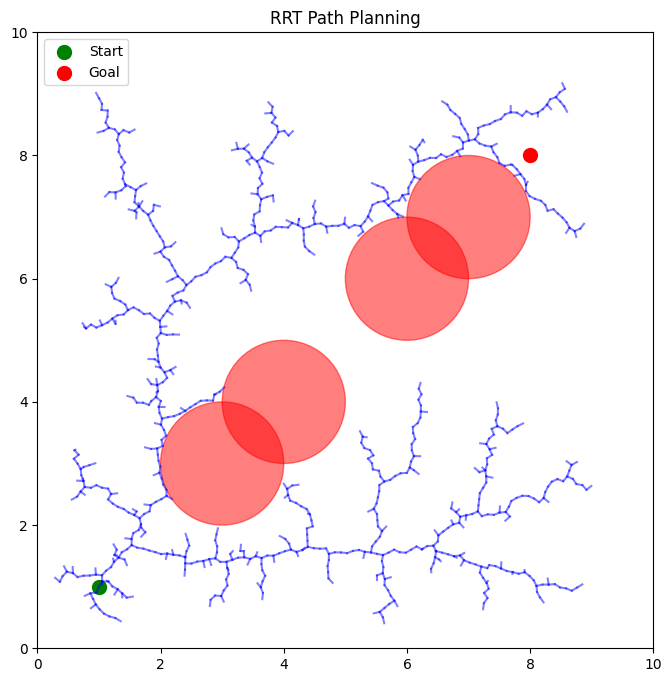

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Class to represent a Node in the RRT
class Node:
    def __init__(self, x, y, parent=None):
        self.x = x
        self.y = y
        self.parent = parent

# Check if a point is inside an obstacle
def is_obstacle(x, y, obstacles):
    for ox, oy, radius in obstacles:
        if np.sqrt((x - ox) ** 2 + (y - oy) ** 2) < radius:
            return True
    return False

# Generate random point within the given bounds
def generate_random_point(bounds):
    x = random.uniform(bounds[0][0], bounds[0][1])
    y = random.uniform(bounds[1][0], bounds[1][1])
    return x, y

# Find the nearest node in the tree to the random point
def nearest_node(nodes, random_point):
    nearest = nodes[0]
    min_dist = np.sqrt((nearest.x - random_point[0]) ** 2 + (nearest.y - random_point[1]) ** 2)
    for node in nodes[1:]:
        dist = np.sqrt((node.x - random_point[0]) ** 2 + (node.y - random_point[1]) ** 2)
        if dist < min_dist:
            nearest = node
            min_dist = dist
    return nearest

# Steer towards the random point from the nearest node
def steer(from_node, to_point, step_size):
    dx = to_point[0] - from_node.x
    dy = to_point[1] - from_node.y
    dist = np.sqrt(dx**2 + dy**2)

    # Normalize the direction and scale it by step size
    if dist > step_size:
        dx = (dx / dist) * step_size
        dy = (dy / dist) * step_size
    else:
        dx, dy = dx, dy

    new_node = Node(from_node.x + dx, from_node.y + dy, from_node)
    return new_node

# Check if a path segment collides with obstacles
def is_collision_free(node1, node2, obstacles):
    steps = 10  # number of steps to break the segment into
    for i in range(steps):
        x = node1.x + (node2.x - node1.x) * (i / steps)
        y = node1.y + (node2.y - node1.y) * (i / steps)
        if is_obstacle(x, y, obstacles):
            return False
    return True

# RRT algorithm
def rrt(start, goal, bounds, obstacles, max_iter=1000, step_size=0.1):
    start_node = Node(start[0], start[1])
    goal_node = Node(goal[0], goal[1])

    nodes = [start_node]
    for _ in range(max_iter):
        random_point = generate_random_point(bounds)

        nearest = nearest_node(nodes, random_point)

        new_node = steer(nearest, random_point, step_size)

        if is_collision_free(nearest, new_node, obstacles):
            nodes.append(new_node)

            # Check if the new node is close enough to the goal
            if np.sqrt((new_node.x - goal_node.x) ** 2 + (new_node.y - goal_node.y) ** 2) < step_size:
                goal_node.parent = new_node
                nodes.append(goal_node)
                break

    # Extract the path
    path = []
    node = goal_node
    while node is not None:
        path.append((node.x, node.y))
        node = node.parent
    path.reverse()

    return path, nodes

# Plotting function
def plot_rrt(start, goal, obstacles, path, nodes):
    plt.figure(figsize=(8, 8))

    # Plot obstacles
    for ox, oy, radius in obstacles:
        circle = plt.Circle((ox, oy), radius, color='r', alpha=0.5)
        plt.gca().add_artist(circle)

    # Plot the path
    path_x, path_y = zip(*path)
    plt.plot(path_x, path_y, color='g', linewidth=2)

    # Plot the tree
    for node in nodes:
        if node.parent:
            plt.plot([node.x, node.parent.x], [node.y, node.parent.y], color='b', alpha=0.5)

    # Plot start and goal
    plt.scatter(start[0], start[1], color='g', s=100, label='Start')
    plt.scatter(goal[0], goal[1], color='r', s=100, label='Goal')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.title("RRT Path Planning")
    plt.show()

# Example usage

start = (1, 1)  # Start position
goal = (8, 8)   # Goal position

# Obstacles as (x, y, radius)
obstacles = [(3, 3, 1), (4, 4, 1), (6, 6, 1), (7, 7, 1)]

# Bounds of the environment (x_min, x_max), (y_min, y_max)
bounds = [(0, 10), (0, 10)]

# Run RRT to find a path
path, nodes = rrt(start, goal, bounds, obstacles)

# Plot the result
plot_rrt(start, goal, obstacles, path, nodes)



Collision Detection and Free Space Sampling in Robotics

In [ ]:
import numpy as np
import random

# Define an obstacle class (circular obstacles for simplicity)
class Obstacle:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius

    def is_collision(self, x, y):
        """Check if the point (x, y) collides with the obstacle."""
        distance = np.sqrt((x - self.x) ** 2 + (y - self.y) ** 2)
        return distance < self.radius

# Function to check if a path from (x1, y1) to (x2, y2) collides with obstacles
def is_collision_free(x1, y1, x2, y2, obstacles):
    # Discretize the line from (x1, y1) to (x2, y2) into smaller steps
    steps = 100
    for i in range(steps + 1):
        # Interpolate the points between (x1, y1) and (x2, y2)
        t = i / steps
        x = x1 + t * (x2 - x1)
        y = y1 + t * (y2 - y1)

        # Check for collision with all obstacles
        for obstacle in obstacles:
            if obstacle.is_collision(x, y):
                return False
    return True

# Function to generate a random point in free space (not colliding with obstacles)
def sample_free_space(bounds, obstacles):
    while True:
        x = random.uniform(bounds[0][0], bounds[0][1])
        y = random.uniform(bounds[1][0], bounds[1][1])

        # Check if the point is in free space (not colliding with obstacles)
        collision_free = True
        for obstacle in obstacles:
            if obstacle.is_collision(x, y):
                collision_free = False
                break

        if collision_free:
            return x, y

# Example usage
obstacles = [Obstacle(5, 5, 1), Obstacle(8, 8, 1)]  # Two obstacles at (5, 5) and (8, 8)
bounds = [(0, 10), (0, 10)]  # Free space bounded between (0, 10) in both x and y directions

# Check if a path from (2, 2) to (7, 7) is collision-free
is_free = is_collision_free(2, 2, 7, 7, obstacles)
print("Path is collision-free:", is_free)

# Sample a random point in free space
random_point = sample_free_space(bounds, obstacles)
print("Random free space point:", random_point)


Path is collision-free: False
Random free space point: (3.567657537194365, 0.5319331227864321)


probabilistic roadmaps algortihm

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


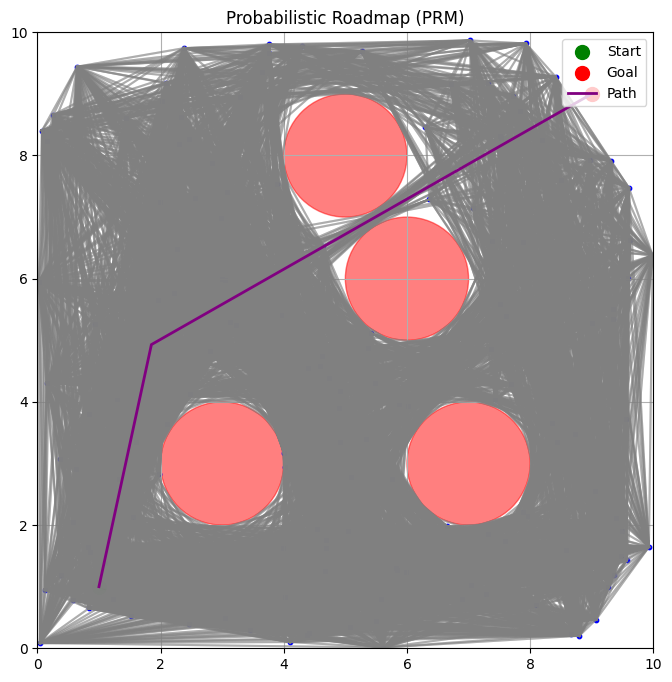

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define an obstacle class (circular obstacles for simplicity)
class Obstacle:
    def __init__(self, x, y, radius):
        self.x = x
        self.y = y
        self.radius = radius

    def is_collision(self, x, y):
        """Check if the point (x, y) collides with the obstacle."""
        distance = np.sqrt((x - self.x) ** 2 + (y - self.y) ** 2)
        return distance < self.radius

# Function to check if a path from (x1, y1) to (x2, y2) collides with obstacles
def is_collision_free(x1, y1, x2, y2, obstacles):
    steps = 100  # number of steps to discretize the path
    for i in range(steps + 1):
        t = i / steps
        x = x1 + t * (x2 - x1)
        y = y1 + t * (y2 - y1)
        for obstacle in obstacles:
            if obstacle.is_collision(x, y):
                return False
    return True

# PRM Algorithm
def prm(start, goal, bounds, obstacles, num_samples=100, k=10):
    # Step 1: Sample points
    samples = []
    while len(samples) < num_samples:
        x = random.uniform(bounds[0][0], bounds[0][1])
        y = random.uniform(bounds[1][0], bounds[1][1])
        if all(not obs.is_collision(x, y) for obs in obstacles):
            samples.append((x, y))

    # Step 2: Build graph
    graph = {i: [] for i in range(len(samples))}
    for i in range(len(samples)):
        for j in range(i + 1, len(samples)):
            if is_collision_free(*samples[i], *samples[j], obstacles):
                graph[i].append(j)
                graph[j].append(i)

    # Step 3: Connect start and goal
    graph[-2] = []  # Start
    graph[-1] = []  # Goal
    for i, (x, y) in enumerate(samples):
        if is_collision_free(start[0], start[1], x, y, obstacles):
            graph[-2].append(i)
            graph[i].append(-2)
        if is_collision_free(goal[0], goal[1], x, y, obstacles):
            graph[-1].append(i)
            graph[i].append(-1)

    # Step 4: Path search using BFS
    def bfs():
        queue = [(-2, [start])]
        visited = set([-2])
        while queue:
            current, path = queue.pop(0)
            if current == -1:
                return path
            for neighbor in graph[current]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    if neighbor == -1:
                        queue.append((neighbor, path + [goal]))
                    else:
                        queue.append((neighbor, path + [samples[neighbor]]))
        return None

    path = bfs()
    return path, samples, graph

# Plotting
def plot_prm(start, goal, obstacles, path, samples, graph):
    plt.figure(figsize=(8, 8))

    # Obstacles
    for obs in obstacles:
        circle = plt.Circle((obs.x, obs.y), obs.radius, color='r', alpha=0.5)
        plt.gca().add_artist(circle)

    # Roadmap
    for i in graph:
        for j in graph[i]:
            if i >= 0 and j >= 0:
                x1, y1 = samples[i]
                x2, y2 = samples[j]
                plt.plot([x1, x2], [y1, y2], color='gray', alpha=0.4)

    # Samples
    for x, y in samples:
        plt.scatter(x, y, color='blue', s=10)

    # Start and Goal
    plt.scatter(*start, color='green', s=100, label='Start')
    plt.scatter(*goal, color='red', s=100, label='Goal')

    # Path
    if path:
        path_x, path_y = zip(*path)
        plt.plot(path_x, path_y, color='purple', linewidth=2, label='Path')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.gca().set_aspect('equal')
    plt.legend()
    plt.title("Probabilistic Roadmap (PRM)")
    plt.grid(True)
    plt.show()

# Example usage
start = (1, 1)
goal = (9, 9)
bounds = [(0, 10), (0, 10)]
obstacles = [
    Obstacle(3, 3, 1),
    Obstacle(6, 6, 1),
    Obstacle(5, 8, 1),
    Obstacle(7, 3, 1)
]

path, samples, graph = prm(start, goal, bounds, obstacles, num_samples=150)

if path:
    plot_prm(start, goal, obstacles, path, samples, graph)
else:
    print("❌ No path found.")
